In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Carregar o dataset
df_salario = pd.read_csv('./datasets/dataset_salario.csv')

In [49]:
# Inspecionar a estrutura do DataFrame
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [50]:
# Copiar DF para DF EDA
df_salario_eda = df_salario.copy()

In [51]:
# Copiar DF para DF Bucketing
df_salario_bucketing = df_salario.copy()

### EDA

In [52]:
# Visualizar os dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [53]:
# Detectar valores ausentes
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [54]:
# Medidas Estatísticas do DF
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

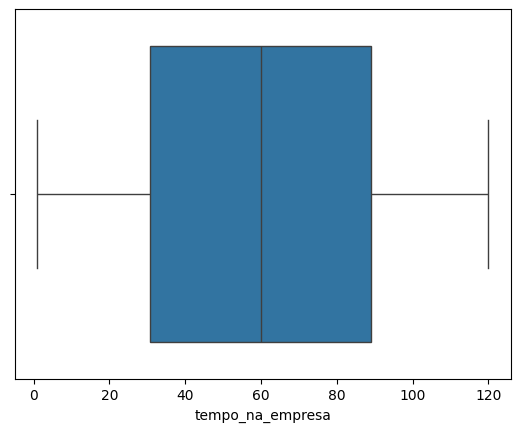

In [55]:
# Verificar / Detectar outliers
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

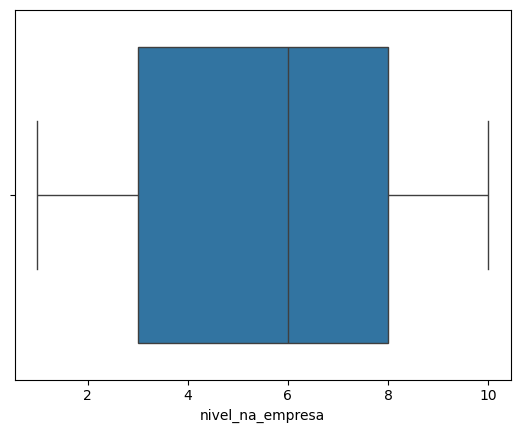

In [56]:
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

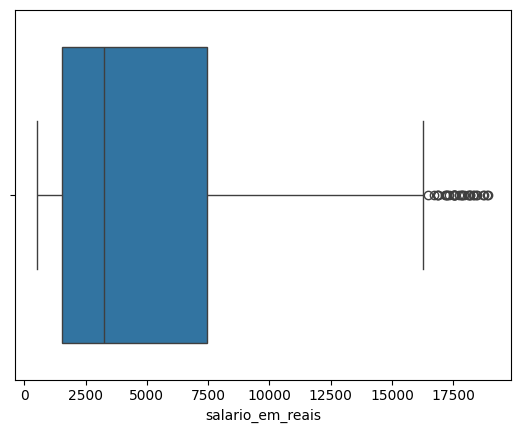

In [57]:
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

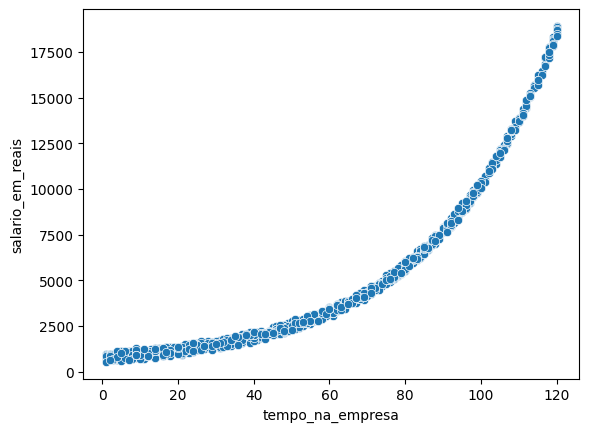

In [58]:
# Cruzamento variaveis numericas com salario em reais (variavel dependente)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

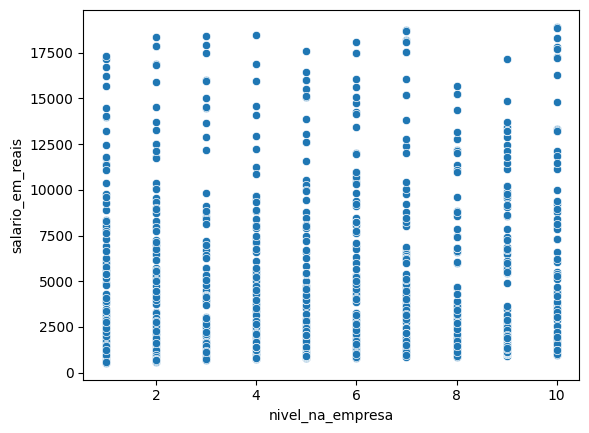

In [59]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

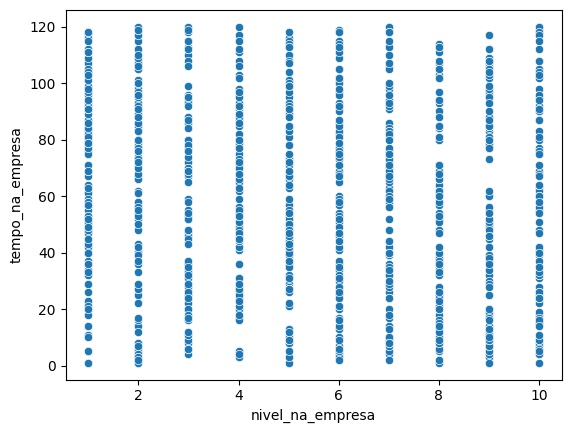

In [60]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

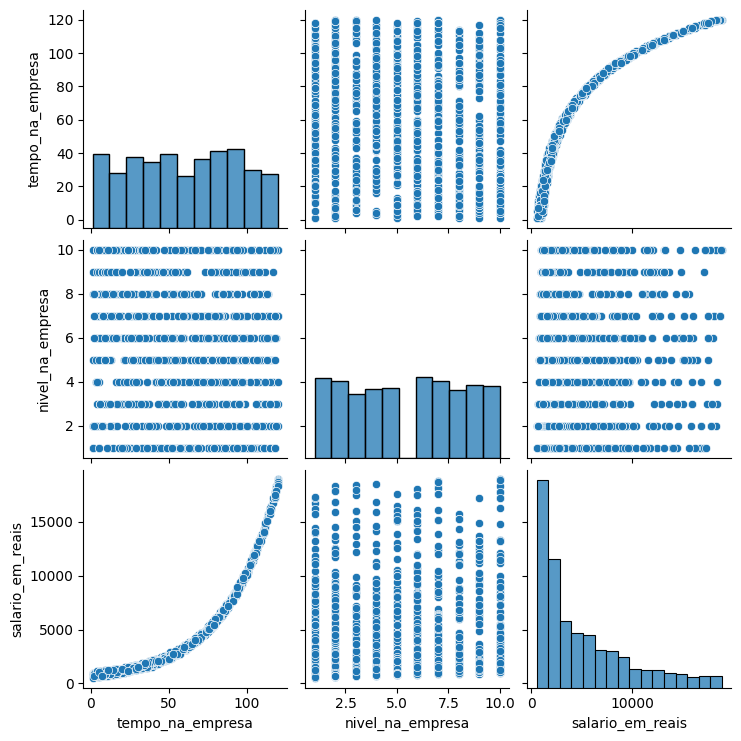

In [61]:
# Histograma das variaveis
sns.pairplot(df_salario_eda)

<Axes: >

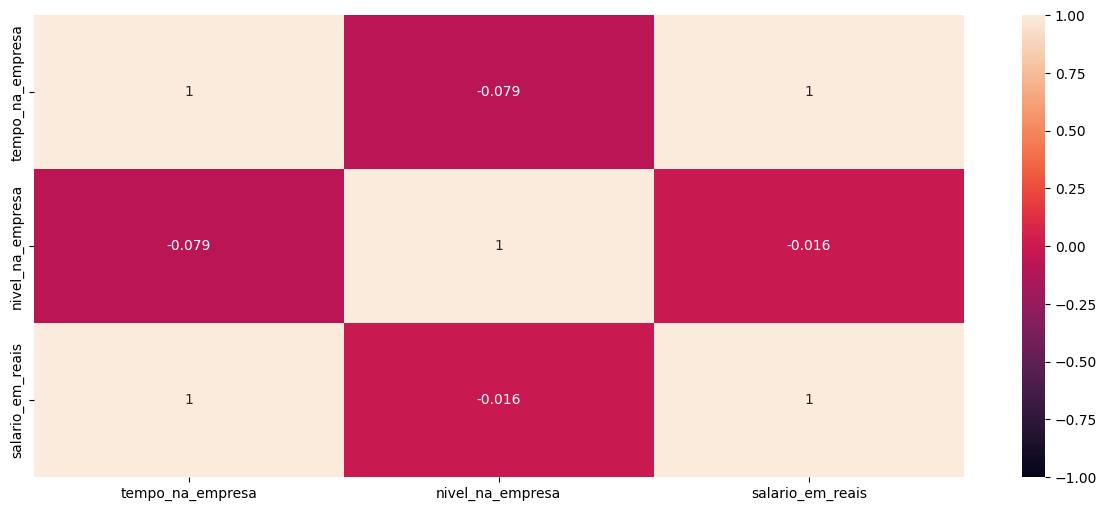

In [62]:
# Mapa de calor
plt.figure(figsize=(15, 6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

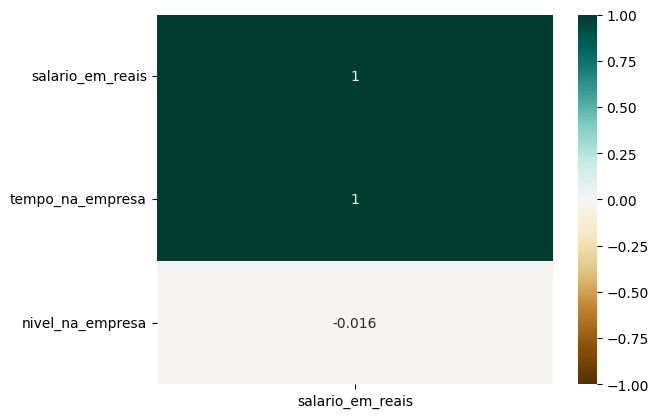

In [63]:
# Formato de Ranking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [64]:
# Bucketing Tempo de casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_casa, labels=labels_tempo_casa, include_lowest=True)

In [65]:
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

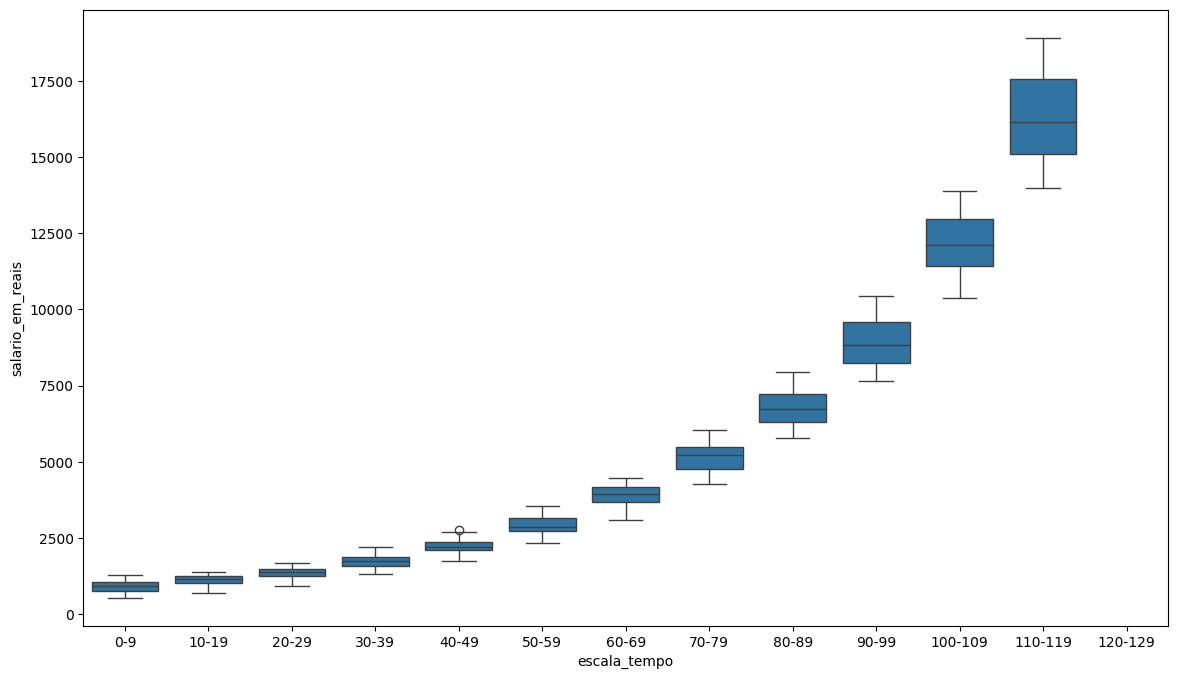

In [66]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

### Treinar Modelo Linear

In [73]:
# Importar bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

import numpy as np

In [68]:
# Criar o Dataset de Treino e Teste
X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [69]:
# Split usando KFold com 5 plasts/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [71]:
kf.split(X)

<generator object _BaseKFold.split at 0x0000024164E92D40>

In [75]:
# Bloco para Treinamento do Modelo

# Pipeline
# Padronizar variaveis numericas - tempo_na_empresa, nivel_na_empresa

# Nomes das Colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para Colunas Numericas
transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer_numericas, colunas_numericas)
])

# Criando o pipeline principal = Preprocessamento + Treinamento do Modelo
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Armazenar RMSE Treino e Teste
rmse_score_fold_train = []
rmse_score_fold_test = []

# Armazenar R2 Score de Teste
r2score_fold_test = []

# Armazenar Residuos
residuos = []

# Armazenar as Predicoes
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treine o modelo no conjunto de treinamento
    model_regr.fit(X_train, y_train)
    
    # Faca predicoes nos conjuntos de treinamento e teste
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)
    
    # Calcule o RMSE para os conjuntos de treinamento e teste
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    
    # Calcule o R2 Score para o conjunto de teste
    r2_test = r2_score(y_test, y_test_pred)
    
    # Calcule os residuos
    residuos_test = np.array(y_test - y_test_pred) 
    
    # Armazene as metricas da iteracao na lista
    rmse_score_fold_train.append(rmse_train)
    rmse_score_fold_test.append(rmse_test)
    r2score_fold_test.append(r2_test)
    residuos.extend(residuos_test)
    y_pred_total.extend(y_test_pred)  

# Medias dos resultados    
rmse_train_final = np.mean(rmse_score_fold_train) 
rmse_test_final = np.mean(rmse_score_fold_test)
r2score_test_final = np.mean(r2score_fold_test)

# RMSE Percentual
percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final * 100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### Analise de Metricas - Modelo Linear

In [77]:
# Metricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Test: {percentual_rmse_final}')
print(f'R2 Score Teste: {r2score_test_final}')

RMSE Treino: 1882.8318426651392
RMSE Teste: 1886.4504221336076
% Dif. RMSE Treino e Test: 0.19218813844503052
R2 Score Teste: 0.8261178870584761
